# DOG and CAT classification

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os

In [ ]:
-In this project image classification is done on dog and cat.
-First, I download the images of dog and cat, then making it into training dataset.
-Loading my own data.

In [2]:
#set dir path where my images are saved
datadir="C:/Users/Asus/Desktop/kagglecatsanddogs_3367a/PetImages"
categories=["Dog","Cat"]



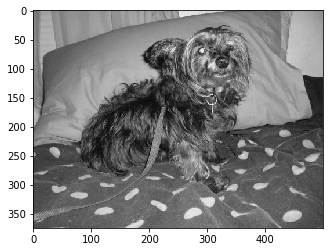

In [3]:
#read the images and converting them into grayscale
for category in categories:
    path=os.path.join(datadir,category)
    for img in os.listdir(path):
        img_array=cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
        plt.imshow(img_array,cmap='gray')
        plt.show
        break
    break

In [4]:
print(img_array)

[[117 117 119 ... 133 132 132]
 [118 117 119 ... 135 134 134]
 [119 118 120 ... 137 136 136]
 ...
 [ 79  74  73 ...  80  76  73]
 [ 78  72  69 ...  72  73  74]
 [ 74  71  70 ...  75  73  71]]


In [5]:
print(img_array.shape)

(375, 500)


As we see above our images are in different shapes , they have  different image size , so we have to convert 
all the images into same image size.

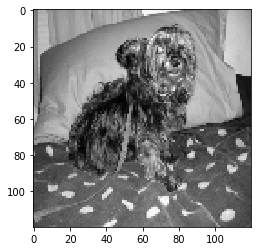

In [6]:

IMG_SIZE=120

new_array=cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))
plt.imshow(new_array,cmap='gray')
plt.show()

In [7]:
#creating our training data for model training and also normalize the data for further processing.
training_data=[]

def create_training_data():
    for category in categories:
        path=os.path.join(datadir,category)
        class_num=categories.index(category)
        for img in os.listdir(path):
            try:
                
                img_array=cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
                new_array=cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))
                training_data.append([new_array,class_num])
            except Exception as e:
                pass
create_training_data()
 
    

In [8]:
#length of our dataset
print(len(training_data))

24946


In [9]:
#from preventing the overfitting and underfitting we have to shuffle the data 
import random
random.shuffle(training_data)

In [10]:
#checking labels
for sample in training_data[:10]:
    print(sample[1])

1
0
0
1
0
0
1
1
1
0


In [11]:
x=[]
y=[]

In [12]:
#making x and y for training the model
for features,label in training_data:
    x.append(features)
    y.append(label)
    
x=np.array(x).reshape(-1,IMG_SIZE,IMG_SIZE,1)

In [13]:
#saving the data 
import pickle

pickle_out=open("x.pickle","wb")
pickle.dump(x,pickle_out)
pickle_out.close()

pickle_out=open("y.pickle","wb")
pickle.dump(y,pickle_out)
pickle_out.close()

In [14]:
#read it back
pickle_in=open("x.pickle","rb")
x=pickle.load(pickle_in)

In [15]:
#normalize the x and y 
x=x/255.0

In [16]:
y=np.array(y)

In [4]:
#importing important modules which are used in creating the model
import tensorflow as tf
from tensorflow.python.keras.layers import Dense,Conv2D,Flatten,MaxPooling2D,Dropout,Activation
from tensorflow.python.keras.models import Sequential

ModuleNotFoundError: No module named 'tensorflow'

In [18]:
# making the model
model=Sequential()
model.add(Conv2D(64,(3,3),input_shape=x.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))


model.add(Conv2D(64,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))


model.add(Flatten())
model.add(Dense(64))

model.add(Dense(1))
model.add(Activation('sigmoid'))

#compilation of model
model.compile(loss="binary_crossentropy",
             optimizer='adam',
             metrics=['accuracy'])

#fit the model 
model.fit(x,y,batch_size=32,epochs=5,validation_split=0.1)


Train on 22451 samples, validate on 2495 samples
Epoch 1/5
22451/22451 [==============================] - 1036s 46ms/sample - loss: 0.6509 - accuracy: 0.6357 - val_loss: 0.5865 - val_accuracy: 0.7082
Epoch 2/5
22451/22451 [==============================] - 1347s 60ms/sample - loss: 0.5405 - accuracy: 0.7288 - val_loss: 0.5456 - val_accuracy: 0.7267
Epoch 3/5
22451/22451 [==============================] - 1073s 48ms/sample - loss: 0.4789 - accuracy: 0.7726 - val_loss: 0.4565 - val_accuracy: 0.7936
Epoch 4/5
22451/22451 [==============================] - 1158s 52ms/sample - loss: 0.4223 - accuracy: 0.8082 - val_loss: 0.4891 - val_accuracy: 0.7788
Epoch 5/5
22451/22451 [==============================] - 1044s 46ms/sample - loss: 0.3695 - accuracy: 0.8361 - val_loss: 0.5148 - val_accuracy: 0.7615


# Prediction

[[0.08517041]]


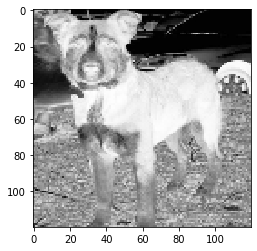

In [38]:
image_index=16
plt.imshow(x[image_index].reshape(120,120),cmap='Greys')
pred=model.predict(x[image_index].reshape(1,IMG_SIZE,IMG_SIZE,1))
print(pred)

[[0.42406744]]


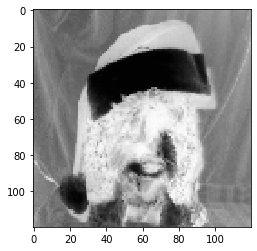

In [40]:
image_index=21
plt.imshow(x[image_index].reshape(120,120),cmap='Greys')
pred=model.predict(x[image_index].reshape(1,IMG_SIZE,IMG_SIZE,1))
print(pred)

[[0.96198165]]


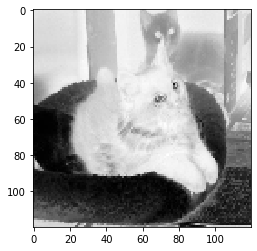

In [42]:
image_index=28
plt.imshow(x[image_index].reshape(120,120),cmap='Greys')
pred=model.predict(x[image_index].reshape(1,IMG_SIZE,IMG_SIZE,1))
print(pred)

[[4.370067e-06]]


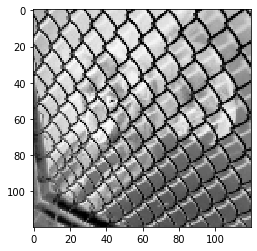

In [43]:
image_index=2855
plt.imshow(x[image_index].reshape(120,120),cmap='Greys')
pred=model.predict(x[image_index].reshape(1,IMG_SIZE,IMG_SIZE,1))
print(pred)

[[0.48836884]]


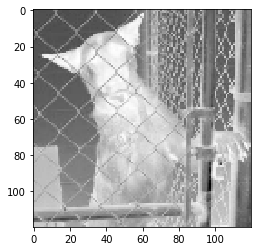

In [44]:
image_index=1
plt.imshow(x[image_index].reshape(120,120),cmap='Greys')
pred=model.predict(x[image_index].reshape(1,IMG_SIZE,IMG_SIZE,1))
print(pred)

[[0.00331434]]


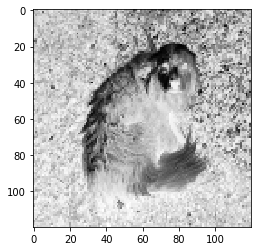

In [46]:
image_index=5528
plt.imshow(x[image_index].reshape(120,120),cmap='Greys')
pred=model.predict(x[image_index].reshape(1,IMG_SIZE,IMG_SIZE,1))
print(pred)

[[0.85681283]]


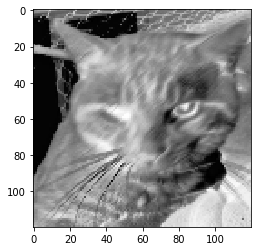

In [47]:
image_index=5728
plt.imshow(x[image_index].reshape(120,120),cmap='Greys')
pred=model.predict(x[image_index].reshape(1,IMG_SIZE,IMG_SIZE,1))
print(pred)

[[0.96198165]]


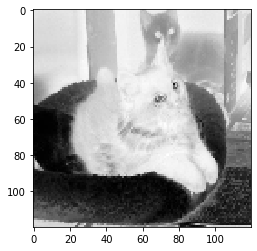

In [45]:
image_index=28
plt.imshow(x[image_index].reshape(120,120),cmap='Greys')
pred=model.predict(x[image_index].reshape(1,IMG_SIZE,IMG_SIZE,1))
print(pred)

As we see above our model accuracy is approx 80%.

In above prediction see the array values of pred , the value which are closer to 0 are dog image and
the values which are closer to 1 are cats , because 1 represents the cat category and 0 is for dog.

In last prediction we saw that it is a cat and model predict 0.9619 which is much much closer to 1 and 1 represents for cat.